##### Copyright 2019 The TensorFlow Authors.

# TensorFlow 2 início rápido para iniciantes

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Ver em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver código fonte no GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixar notebook</a>
  </td>
</table>

Esta breve introdução usa [Keras] (https://www.tensorflow.org/guide/keras/overview) para:

1. Criar uma rede neural que classifique imagens.
2. Treinar essa rede neural.
3. E, finalmente, avaliar a precisão do modelo.

Este é um arquivo de bloco de notas [Google Colaboratory] (https://colab.research.google.com/notebooks/welcome.ipynb). Os programas Python são executados diretamente no navegador - uma ótima maneira de aprender e usar o TensorFlow. Para seguir este tutorial, execute o bloco de anotações no Google Colab clicando no botão na parte superior desta página.

1. No Colab, conecte-se a um tempo de execução do Python: No canto superior direito da barra de menus, selecione *CONNECT*.
2. Execute todas as células de código do notebook: Selecione *Tempo de execução* > *Executar tudo*.

Baixe e instale o pacote TensorFlow 2. Importe o TensorFlow para o seu programa:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Carregue e prepare o [conjunto de dados MNIST] (http://yann.lecun.com/exdb/mnist/). Converta as amostras de números inteiros em números de ponto flutuante:

In [2]:
from sklearn.model_selection import train_test_split

# Load the MNIST data
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

Crie o modelo `tf.keras.Sequential` empilhando camadas. Escolha uma função otimizadora e de perda para treinamento:

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Treine e avalie o modelo:

In [4]:
# Fit the model and include validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3334 - accuracy: 0.9001 - val_loss: 0.1459 - val_accuracy: 0.9558
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1587 - accuracy: 0.9517 - val_loss: 0.1043 - val_accuracy: 0.9691
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1204 - accuracy: 0.9632 - val_loss: 0.0927 - val_accuracy: 0.9723
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0997 - accuracy: 0.9691 - val_loss: 0.0847 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0889 - accuracy: 0.9719 - val_loss: 0.0881 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0873 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.0891 - val_accuracy:

O classificador de imagem agora é treinado para ~98% de acurácia neste conjunto de dados. Para saber mais, leia os [tutoriais do TensorFlow] (https://www.tensorflow.org/tutorials/).

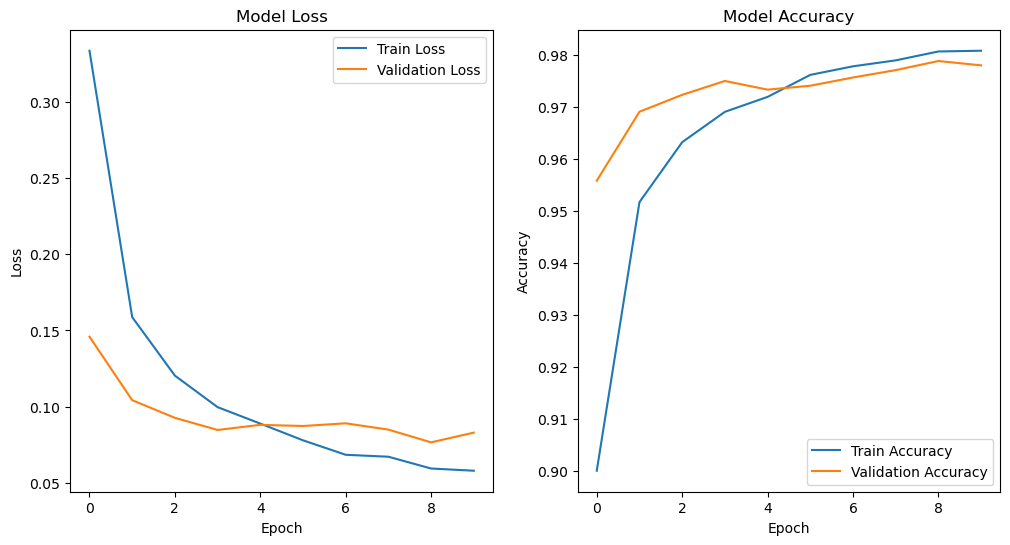

In [5]:
import matplotlib.pyplot as plt

# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [6]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0824 - accuracy: 0.9772 - 1s/epoch - 4ms/step


[0.08244740217924118, 0.9771999716758728]

## Exercícios

Conduza uma Exploratory Data Analysis na dataset (EDA)